# CICERO SCM notebook parallel example

Import some stuff

In [1]:
import sys
import re
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as pdt
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

Import the model

In [2]:
sys.path.insert(0,os.path.join(os.getcwd(), '../', 'src'))
from ciceroscm import CICEROSCM

Define some input handling functions to give us example inputs

In [3]:
# NBVAL_IGNORE_OUTPUT
#from ciceroscm.input_handler import read_inputfile,read_components,read_natural_emissions
from ciceroscm.parallel.cscmparwrapper import run_ciceroscm_parallel
import ciceroscm.input_handler as input_handler

<IPython.core.display.Javascript object>

/home/masan/gitrepos/ciceroscm/venv/lib/python3.7/site-packages/scmdata/database/_database.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


Define data directory

In [4]:
test_data_dir = os.path.join(os.getcwd(), '../', 'tests', 'test-data')

Define emissions data

In [5]:

gaspam_data = input_handler.read_components(
    os.path.join(test_data_dir, "gases_v1RCMIP.txt")
)
conc_data = input_handler.read_inputfile(
    os.path.join(test_data_dir, "ssp245_conc_RCMIP.txt"), True, 1750, 2100
)
ih = input_handler.InputHandler({"nyend": 2050, "nystart": 1900, "emstart": 2015})
em_data = ih.read_emissions(os.path.join(test_data_dir, "ssp245_em_RCMIP.txt"))
nat_ch4_data = input_handler.read_natural_emissions(
    os.path.join(test_data_dir, "natemis_ch4.txt"), "CH4"
)
nat_n2o_data = input_handler.read_natural_emissions(
    os.path.join(test_data_dir, "natemis_n2o.txt"), "N2O"
)

Make a list of dictionaries to define the parameter ensemble - keys should be pamset_udm, pamset_emiconc and Index...

In [6]:
   cfgs = [
        {
            "pamset_udm": {
                "rlamdo": 15.1,
                "akapa": 0.657,
                "cpi": 0.208,
                "W": 2.2,
                "beto": 6.9,
                "lambda": 0.606,
                "mixed": 107.0,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.5,
                "qdirso2": -0.3701,
                "qindso2": -0.4163,
                "qbc": 0.163,
                "qoc": -0.084,
                "qh2o_ch4": 0.171,
            },
            "Index": "13555_old_NR_rounded",
        },
        {
            "pamset_udm": {
                "rlamdo": 15.08357,
                "akapa": 0.6568376339229769,
                "cpi": 0.2077266,
                "W": 2.205919,
                "beto": 6.89822,
                "lambda": 0.6062529,
                "mixed": 107.2422,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.5,
                "qdirso2": -0.3562,
                "qindso2": -0.96609,
                "qbc": 0.1566,
                "qoc": -0.0806,
            },
            "Index": "13555_old_NR_improved",
        },
        {
            "pamset_udm": {
                "rlamdo": 15.08357,
                "akapa": 0.6568376339229769,
                "cpi": 0.2077266,
                "W": 2.205919,
                "beto": 6.89822,
                "lambda": 0.6062529,
                "mixed": 107.2422,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.5,
                "qdirso2": -0.3701323367808028 / 1.5,
                "qindso2": -0.4162980444986502 * 1.5,
                "qbc": 0.162692563111132,
                "qoc": -0.08377713183167902,
            },
            "Index": "13555_old_NR",
        },
        {
            "pamset_udm": {
                "rlamdo": 5.269455,
                "akapa": 0.40099950002568496,
                "cpi": 0.2054687,
                "W": 1.95183,
                "beto": 3.278654,
                "lambda": 0.7308369,
                "mixed": 115.1219,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.3,
                "qdirso2": -0.32211222516087934,
                "qindso2": -0.3622885009449893,
                "qbc": 0.1415852070009452,
                "qoc": -0.07290808089507649,
            },
            "Index": "10496_old_NR",
        },
        {
            "pamset_udm": {
                "rlamdo": 5.269455,
                "akapa": 0.40099950002568496,
                "cpi": 0.2054687,
                "W": 1.95183,
                "beto": 3.278654,
                "lambda": 0.7308369,
                "mixed": 115.1219,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.3,
                "qdirso2": -0.32211222516087934,
                "qindso2": -0.3622885009449893,
                "qbc": 0.1415852070009452,
                "qoc": -0.07290808089507649,
            },
            "Index": "10974_old_NR",
        },
        {
            "pamset_udm": {
                "rlamdo": 23.71469,
                "akapa": 0.5486541129586187,
                "cpi": 0.4059296,
                "W": 2.090927,
                "beto": 4.426507,
                "lambda": 0.6345007,
                "mixed": 97.25478,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.3,
                "qdirso2": -0.4031202924043847,
                "qindso2": -0.453400507735301,
                "qbc": 0.17719249872571508,
                "qoc": -0.09124374858602939,
            },
            "Index": "Unknown_old_NR",
        },
        {
            "pamset_udm": {
                "rlamdo": 23.13088,
                "akapa": 0.6588532950589802,
                "cpi": 0.1690946,
                "W": 2.228695,
                "beto": 2.623041,
                "lambda": 0.5402487,
                "mixed": 99.86714,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.3,
                "qdirso2": -0.882827534329248,
                "qindso2": -0.9929404692583796,
                "qbc": 0.3880489761967636,
                "qoc": -0.1998224726091362,
            },
            "Index": "28925_old_NR",
        },
    ]

Define scenarios as a list of dictionaries.

In [7]:
scenarios=[]
for i in range(3):
    em_data_here = em_data.mul((1 + i / 5))
    new_scen = {
        "gaspam_data": gaspam_data,
        "nyend": 2050,
        "nystart": 1900,
        "emstart": 2015,
        "concentrations_data": conc_data,
        "nat_ch4_data": nat_ch4_data,
        "nat_n2o_data": nat_n2o_data,
        "emissions_data": em_data_here,
        "udir": test_data_dir,
        "idtm":24,
        "scenname": "ssp245-plus-%d-percent" % np.multiply(i,20.),
    }
    scenarios.append(new_scen)
    
    

Parallel processor loops over all scenarios and configuration lists

In [8]:
# NBVAL_IGNORE_OUTPUT
output_variables = ["Heat Content|Ocean", "Surface Air Temperature Change"]
results = run_ciceroscm_parallel(scenarios, cfgs, output_variables)


Parallel runs:   0%|          | 0.00/6.00 [00:00<?, ?it/s]

Parameter udir is not used. Please check if you have a typo
Parameter scenname is not used. Please check if you have a typo
Parameter udir is not used. Please check if you have a typoParameter udir is not used. Please check if you have a typo
Parameter udir is not used. Please check if you have a typo
Parameter scenname is not used. Please check if you have a typoParameter scenname is not used. Please check if you have a typo


Parameter scenname is not used. Please check if you have a typo
Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40Parameter threstemp not in pamset. Using default value 7.0

Parameter foan not in pamset. Using default value 0.61Parameter ldtime not in pamset. Using default value 12

Pa

Heat Content|Ocean
Surface Air Temperature Change
Heat Content|Ocean


Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531


Surface Air Temperature Change

Parameter lm not in pamset. Using default value 40


Parameter ldtime not in pamset. Using default value 12
Parameter qh2o_ch4 not in pamset. Using default value 0.091915


Heat Content|Ocean

Parameter ref_yr not in pamset. Using default value 2010


Parameter beta_f not in pamset. Using default value 0.287Parameter threstemp not in pamset. Using default value 7.0

Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531

Heat Content|OceanSurface Air Temperature Change


Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter qh2o_ch4 not in pamset. Using default value 0.091915
Parameter ref_yr not in pamset. Using default value 2010

Surface Air Temperature Change


Parameter threstemp not in pamset. Using default value 7.0

Parameter beta_f not in pamset. Using default value 0.287
Parameter foan not in pamset. Using default value 0.61

Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40
Parameter threstemp not in pamset. Using default value 7.0
Parameter ldtime not in pamset. Using default value 12Parameter foan not in pamset. Using default value 0.61

Parameter qh2o_ch4 not in pamset. Using default value 0.091915Parameter foas not in pamset. Using default value 0.81

Parameter ebbeta not in pamset. Using default value 0.0Parameter ref_yr not in pamset. Using default value 2010

Parameter fnso not in pamset. Using default value 0.7531Parameter beta_f not in pamset. Using default value 0.287

Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter qh2o_ch4 not in pamset. Using defaul

Heat Content|Ocean
Surface Air Temperature Change
Heat Content|Ocean
Surface Air Temperature Change
Heat Content|Ocean
Heat Content|Ocean


Parameter udir is not used. Please check if you have a typo

Surface Air Temperature Change

Parameter scenname is not used. Please check if you have a typo


Surface Air Temperature Change


Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter threstemp not in pamset. Using default value 7.0
Parameter ebbeta not in pamset. Using default value 0.0Parameter foan not in pamset. Using default value 0.61
Parameter fnso not in pamset. Using default value 0.7531

Parameter foas not in pamset. Using default value 0.81Parameter lm not in pamset. Using default value 40

Parameter ebbeta not in pamset. Using default value 0.0
Parameter ldtime not in pamset. Using default value 12
Parameter fnso not in pamset. Using default value 0.7531Parameter udir is not used. Please check if you have a typo
Parameter qh2o_ch4 not in pamset. Using default value 0.091915

Parameter lm not in pamset. Using default value 40Parameter scenname is not used. Please check if you have a typo

Parameter ref_yr not in pamset. Using default value 2010
Parameter ldtime not in pamset. Usi

Heat Content|Ocean
Surface Air Temperature Change


Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter qh2o_ch4 not in pamset. Using default value 0.091915
Parameter ref_yr not in pamset. Using default value 2010
Parameter beta_f not in pamset. Using default value 0.287


Heat Content|Ocean
Heat Content|Ocean
Surface Air Temperature Change
Surface Air Temperature ChangeHeat Content|Ocean



Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0Parameter threstemp not in pamset. Using default value 7.0

Surface Air Temperature Change

Parameter foan not in pamset. Using default value 0.61Parameter fnso not in pamset. Using default value 0.7531

Parameter foas not in pamset. Using default value 0.81Parameter lm not in pamset. Using default value 40

Parameter ebbeta not in pamset. Using default value 0.0Parameter ldtime not in pamset. Using default value 12

Parameter fnso not in pamset. Using default value 0.7531Parameter qh2o_ch4 not in pamset. Using default value 0.091915

Parameter lm not in pamset. Using default value 40Parameter threstemp not in pamset. Using default value 7.0Parameter ref_yr not in pamset. Using default value 2010


Parameter ldtime not in pamset. Using default value 12Parameter foan not in pamset. Using default value 0.61Parameter beta_f not in pamset. Using default value 0.287


Parameter qh2o_ch4 not in pamset. Using default value 0.091915Parameter foas not in pamset. Using default value 0.81

Parameter ref_yr not in pamset. Using default value 2010
Parameter ebbeta not in pamset. Using def

Heat Content|Ocean
Surface Air Temperature Change


Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter qh2o_ch4 not in pamset. Using default value 0.091915
Parameter ref_yr not in pamset. Using default value 2010
Parameter beta_f not in pamset. Using default value 0.287


Heat Content|Ocean
Surface Air Temperature Change
Heat Content|Ocean
Surface Air Temperature Change


Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter qh2o_ch4 not in pamset. Using default value 0.091915
Parameter ref_yr not in pamset. Using default value 2010
Parameter beta_f not in pamset. Using default value 0.287


Heat Content|Ocean
Surface Air Temperature Change


Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter qh2o_ch4 not in pamset. Using default value 0.091915
Parameter ref_yr not in pamset. Using default value 2010
Parameter beta_f not in pamset. Using default value 0.287


Heat Content|Ocean
Surface Air Temperature Change


Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter qh2o_ch4 not in pamset. Using default value 0.091915
Parameter ref_yr not in pamset. Using default value 2010
Parameter beta_f not in pamset. Using default value 0.287


Heat Content|Ocean
Surface Air Temperature Change
Heat Content|Ocean
Surface Air Temperature Change
Heat Content|Ocean
Surface Air Temperature Change


Parameter threstemp not in pamset. Using default value 7.0
Parameter foan not in pamset. Using default value 0.61
Parameter foas not in pamset. Using default value 0.81
Parameter ebbeta not in pamset. Using default value 0.0
Parameter fnso not in pamset. Using default value 0.7531
Parameter lm not in pamset. Using default value 40
Parameter ldtime not in pamset. Using default value 12
Parameter qh2o_ch4 not in pamset. Using default value 0.091915
Parameter ref_yr not in pamset. Using default value 2010
Parameter beta_f not in pamset. Using default value 0.287


Heat Content|Ocean
Surface Air Temperature Change


Look at the output openSCMrunner object

In [9]:
results.head()

time                                                                                                                        1900-01-01  \
climate_model model                 region run_id                scenario              unit variable                                     
CICERO-SCM-PY ssp245-plus-0-percent World  13555_old_NR_rounded  ssp245-plus-0-percent ZJ   Heat Content|Ocean               -1.599356   
                                                                                       K    Surface Air Temperature Change   -0.013860   
                                           13555_old_NR_improved ssp245-plus-0-percent ZJ   Heat Content|Ocean               -2.340682   
                                                                                       K    Surface Air Temperature Change   -0.020305   
                                           13555_old_NR          ssp245-plus-0-percent ZJ   Heat Content|Ocean               -1.716253   

time                                                                                                                        1901-01-01  \
climate_model model                 region run_id                scenario              unit variable                                     
CICERO-SCM-PY ssp245-plus-0-percent World  13555_old_NR_rounded  ssp245-plus-0-percent ZJ   Heat Content|Ocean               -4.281792   
                                                                                       K    Surface Air Temperature Change   -0.033694   
                                           13555_old_NR_improved ssp245-plus-0-percent ZJ   Heat Content|Ocean               -6.317204   
                                                                                       K    Surface Air Temperature Change   -0.049749   
                                           13555_old_NR          ssp245-plus-0-percent ZJ   Heat Content|Ocean               -4.604001   

time                                                                                                                        1902-01-01  \
climate_model model                 region run_id                scenario              unit variable                                     
CICERO-SCM-PY ssp245-plus-0-percent World  13555_old_NR_rounded  ssp245-plus-0-percent ZJ   Heat Content|Ocean               -6.631966   
                                                                                       K    Surface Air Temperature Change   -0.041915   
                                           13555_old_NR_improved ssp245-plus-0-percent ZJ   Heat Content|Ocean               -9.891925   
                                                                                       K    Surface Air Temperature Change   -0.062778   
                                           13555_old_NR          ssp245-plus-0-percent ZJ   Heat Content|Ocean               -7.150478   

time                                                                                                                        1903-01-01  \
climate_model model                 region run_id                scenario              unit variable                                     
CICERO-SCM-PY ssp245-plus-0-percent World  13555_old_NR_rounded  ssp245-plus-0-percent ZJ   Heat Content|Ocean               -8.751918   
                                                                                       K    Surface Air Temperature Change   -0.047794   
                                           13555_old_NR_improved ssp245-plus-0-percent ZJ   Heat Content|Ocean              -13.226613   
                                                                                       K    Surface Air Temperature Change   -0.072834   
                                           13555_old_NR          ssp245-plus-0-percent ZJ   Heat Content|Ocean               -9.467011   

time                                                                                                                        1904-01-

Plot some plume plots, showing the range of temperature for each scenario (looking at percentiles of the parameter response distribution)

In [10]:

plot_kwargs = dict(
    quantiles_plumes=[((0.05, 0.95), 0.5), ((0.5,), 1.0)],
    quantile_over="run_id",
    hue_var="scenario",
    style_var="model",
    style_label="IAM",
    time_axis="year",
)


and plot!

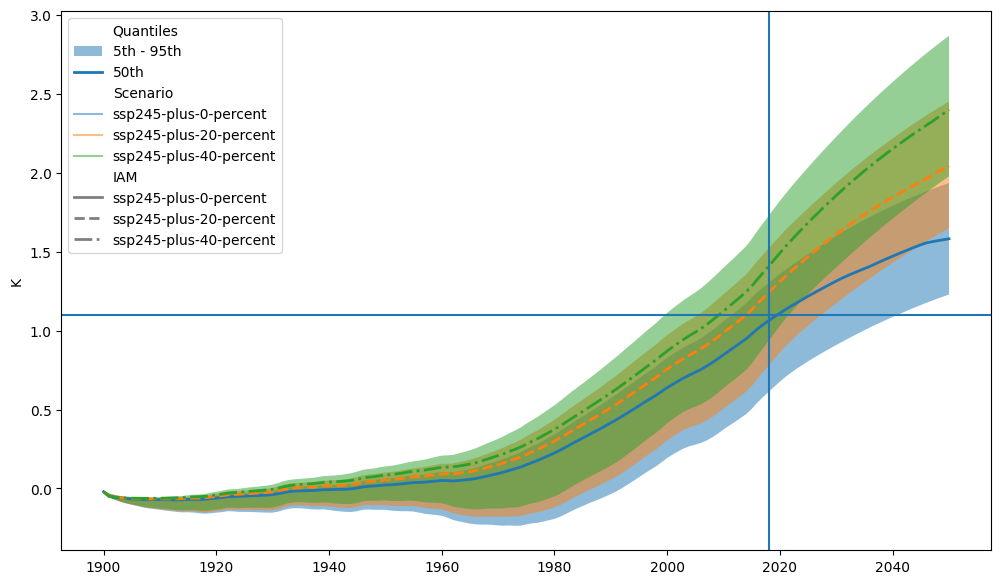

In [11]:

# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
results.filter(variable="Surface Air Temperature Change").plumeplot(
    ax=ax, **plot_kwargs
)
ax.axhline(1.1)
ax.axvline(2018)
